# This is a Jupyter notebook for cluster coincidence study

The output root file is produced by a coincidence analyzer looping over MultiCoincidenceArtRecordCollection.

In [1]:
import ROOT
file1 = ROOT.TFile('coincidenceAnalyzer.root'); ## gas gun
file2 = ROOT.TFile('coincidenceAnalyzer_migun.root'); ## injection gun
c = ROOT.TCanvas("c","c",800,600)
leg = ROOT.TLegend(0.62,0.6,0.88,0.88)

Welcome to JupyROOT 6.08/04


## 1. Get histograms for different dcalo (from 0 to 6 here, 0 is self-coincidence or pileup)

In [2]:
dtdcalo1_gas = file1.Get("coincidenceAnalyzer/dtdcalo1")
dtdcalo1_inj = file2.Get("coincidenceAnalyzer/dtdcalo1")

## 2. Set different line colors for better visualization

In [3]:
def set_colors():
    dtdcalo1_gas.SetLineColor(1)
    dtdcalo1_gas.SetLineWidth(2)
    dtdcalo1_inj.SetLineColor(2)
    dtdcalo1_inj.SetLineWidth(2)

## 3. Draw legend

In [4]:
def draw_legend():
    leg.Clear()
    leg.AddEntry(dtdcalo1_gas,"gas gun","l")
    leg.AddEntry(dtdcalo1_inj,"injection gun","l")
    leg.SetBorderSize(0)
    leg.Draw()

## 4. Draw histograms

In [5]:
def draw_hists():
    ROOT.gStyle.SetOptStat(0)
    c.SetLogy()
    dtdcalo1_gas.Draw("hist")
    dtdcalo1_inj.Draw("hist same")
    c.Draw()

## 5. Normalized by the area

In [6]:
def normalize():
    dtdcalo1_gas.Scale(1./dtdcalo1_gas.GetEntries())
    dtdcalo1_inj.Scale(1./dtdcalo1_inj.GetEntries())

## 6. Everything together

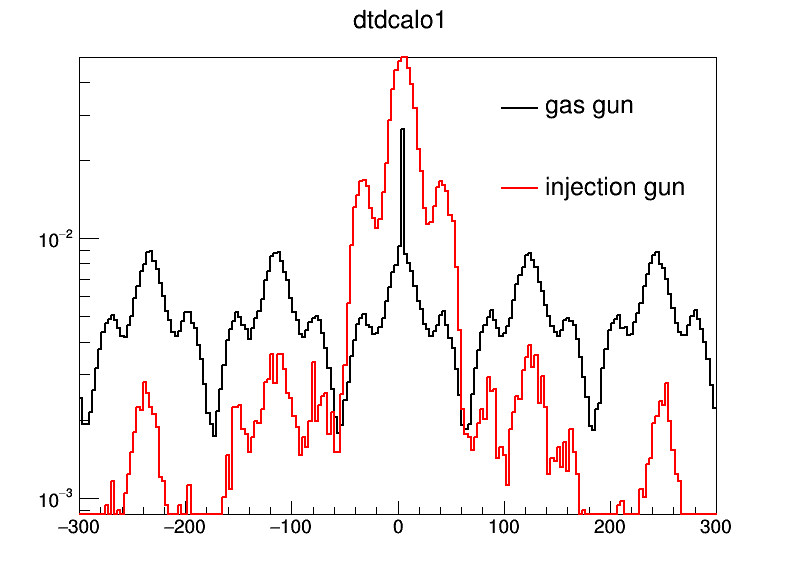

In [7]:
set_colors()
normalize()
draw_hists()
draw_legend()